In [21]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.common.enums.enum import (
    MapLayerType, 
    ObjectSize, 
    GateTypes, 
    TemplateTypes, 
    ObjectRotation, 
    YamlReplacementKeywords,
    CheckPlacementReturnTypes
)

from aoe2mapgenerator.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.common.constants.constants import DEFAULT_EMPTY_VALUE, BASE_SCENE_DIR_LINUX, BASE_SCENARIO_NAME, TEMPLATE_DIR_LINUX
from aoe2mapgenerator.common.constants.default_objects import GHOST_OBJECT_DISPLACEMENT
from aoe2mapgenerator.common.enums.enum import GateTypes
import multiprocessing as mp
from aoe2mapgenerator.map.map import Map
import os
from aoe2mapgenerator.serializer.serializer import (
    _convert_map_value_to_string,_get_enum_list, 
    _recursive_parse_enum_to_string, serialize_map, 
    get_all_functions_and_arguments, 
    _get_functions,
    _get_function_arguments,
    _get_default_arguments,
    _convert_enum_instance_to_string)
from aoe2mapgenerator.triggers.triggers import TriggerObject
from aoe2mapgenerator.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum
from aoe2mapgenerator.units.wallgenerators.voronoi import VoronoiGenerator
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
from aoe2mapgenerator.units.placers.statictemplate import TemplateCreator
from aoe2mapgenerator.units.placers.group_placer import GroupPlacerManager
from aoe2mapgenerator.units.placers.point_manager import PointManager
from aoe2mapgenerator.testing import awesome_function
from aoe2mapgenerator.map.map_object import MapObject
from aoe2mapgenerator.units.placers.point_selector import PointSelector
from aoe2mapgenerator.visualizer.visualizer import Visualizer
from aoe2mapgenerator.units.placers.gate_placer import GatePlacer

In [22]:
# import cProfile
# data = cProfile.run('vor_gen.generate_voronoi_cells(point_manager=point_manager_2, interpoint_distance=2, map_layer_type=MapLayerType.UNIT)')

In [23]:
import time
n = 256
start_time = time.time()
aoe2_map = Map(n)

point_manager = PointManager()
group_placer = GroupPlacerManager(aoe2_map)

point_manager.add_points([(i,j) for i in range(n) for j in range(n)])

# groups = 5
# group_size = 250
# total = groups * group_size

# group_placer.place_groups(
#     point_manager=point_manager,
#     map_layer_type=MapLayerType.UNIT,
#     obj_type=UnitInfo.ALFRED_THE_ALPACA,
#     player_id=PlayerId.ONE,
#     groups=groups,
#     group_size=group_size,
#     clumping=25
# )

In [24]:
vor_gen = VoronoiGenerator(aoe2_map)
point_manager_2 = PointManager()
point_manager_2.add_points([(i,j) for i in range(25, 150) for j in range(100, 125)])
zones = vor_gen.generate_voronoi_cells(point_manager=point_manager_2, interpoint_distance=5, map_layer_type=MapLayerType.ZONE)
# zones = vor_gen.generate_voronoi_cells(point_manager=point_manager, interpoint_distance=100, map_layer_type=MapLayerType.ZONE)

In [25]:
# selector = PointSelector(aoe2_map)
# points = selector.get_points_from_map_layer(MapLayerType.ZONE, zones[4])
# point_manager.clear()
# point_manager.add_points(points)

In [26]:
vis = Visualizer(aoe2_map)

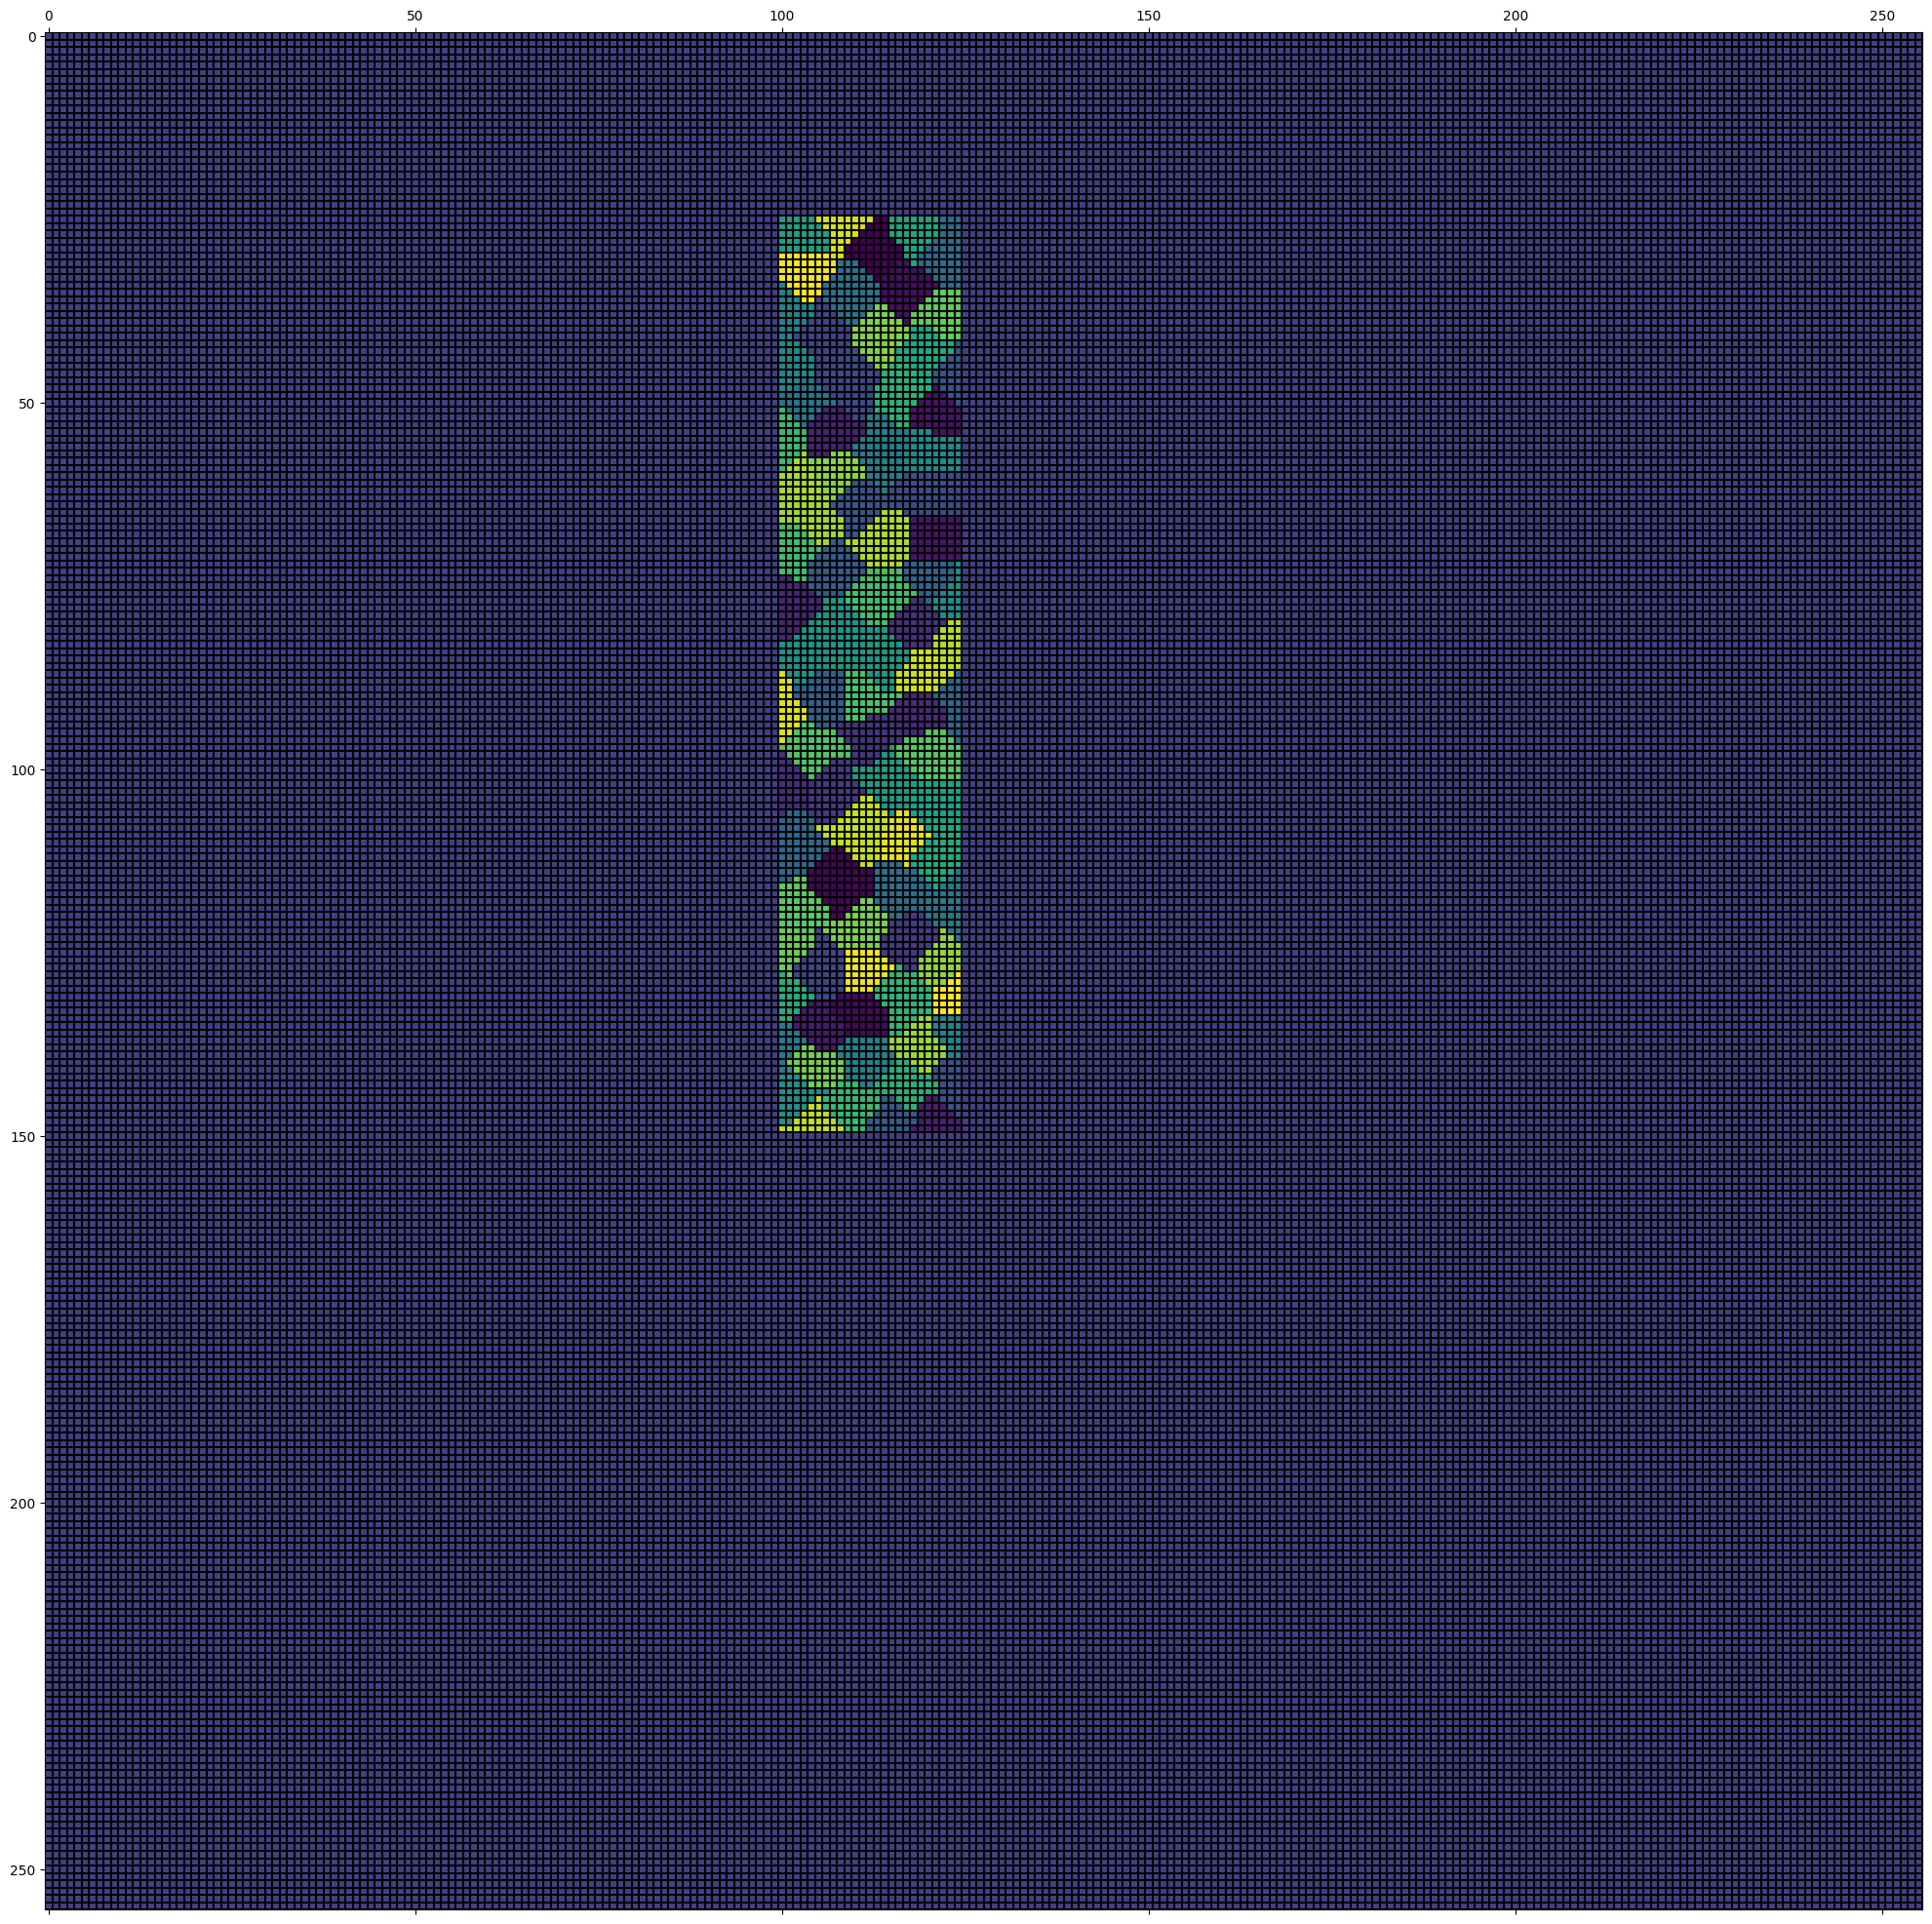

In [27]:
vis.visualize_mat(MapLayerType.ZONE)

In [17]:
def generate_random_points_in_range(number_of_points, n):
    return [(random.randint(0,n-1), random.randint(0,n-1)) for i in range(number_of_points)]

In [8]:
import numpy as np
from scipy.ndimage import distance_transform_edt

def generate_voronoi_grid(grid_size, seed_points):
    """
    Generate a Voronoi diagram on a cell grid.

    Args:
        grid_size (tuple): The size of the grid (rows, columns).
        seed_points (list): List of (x, y) tuples representing seed points.

    Returns:
        np.ndarray: A 2D array with the same size as grid, where each cell contains the index of the nearest seed point.
    """
    rows, cols = grid_size
    seeds = np.array(seed_points)

    # Initialize an array to hold the seed indices
    grid = np.full((rows, cols), -1)

    # Place seed indices on the grid
    for idx, (y, x) in enumerate(seeds):
        grid[x, y] = idx

    # Create an array to hold the distances
    distance_grid = np.full((rows, cols), np.inf)
    indices_grid = np.zeros((rows, cols), dtype=int)
    # Compute the Euclidean Distance Transform for each seed
    for idx, (y, x) in enumerate(seeds):
        mask = (grid == idx)
        distances = distance_transform_edt(~mask, return_distances=True, return_indices=False)
        update_mask = distances < distance_grid
        distance_grid[update_mask] = distances[update_mask]
        indices_grid[update_mask] = idx

    return indices_grid

# Example usage
grid_size = (256, 256)
seed_points = generate_random_points_in_range(25,256)
voronoi_grid = generate_voronoi_grid(grid_size, seed_points)

# To visualize the Voronoi diagram (optional)
import matplotlib.pyplot as plt

plt.imshow(voronoi_grid, cmap='tab20')
plt.scatter(*zip(*seed_points), color='red')
plt.title("Voronoi Diagram on Grid")
plt.show()

NameError: name 'generate_random_points_in_range' is not defined

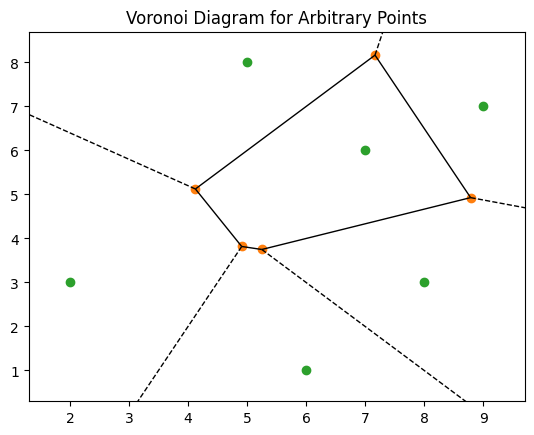

In [41]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Function to generate Voronoi diagram for a set of arbitrary points
def generate_voronoi(points):
    """
    Generate a Voronoi diagram for a set of arbitrary points.

    Args:
        points (array-like): An array of shape (n, 2) representing n points in 2D space.

    Returns:
        Voronoi: A SciPy Voronoi object containing the Voronoi diagram information.
    """
    # Convert points to a NumPy array if they are not already
    points = np.array(points)

    # Compute Voronoi diagram
    vor = Voronoi(points)

    return vor

# Example usage
points = np.array([
    [2, 3],
    [5, 8],
    [6, 1],
    [7, 6],
    [8, 3],
    [9, 7]
])

# Generate Voronoi diagram
vor = generate_voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)
ax.plot(points[:, 0], points[:, 1], 'o')
ax.set_title("Voronoi Diagram for Arbitrary Points")
plt.show()


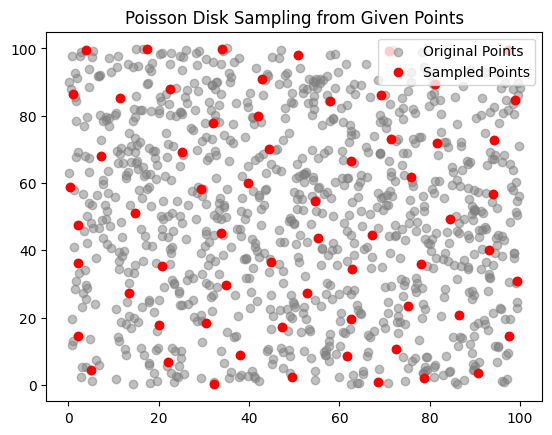

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

def poisson_disk_sampling(points, radius, k=30):
    """
    Perform Poisson Disk Sampling from a given set of points using L2 distance.
    
    Args:
        points (array-like): A 2D array of shape (n, 2) representing n points in 2D space.
        radius (float): Minimum distance between points.
        k (int): Number of candidate points to consider (default is 30).

    Returns:
        np.ndarray: A subset of the input points that are approximately evenly spaced.
    """
    # Convert points to a NumPy array
    points = np.asarray(points)
    
    # Create a KDTree for efficient distance queries
    tree = cKDTree(points)
    
    # Initialize with a random point
    initial_index = np.random.randint(0, len(points))
    sample_indices = [initial_index]
    
    # List of active points (indices)
    active_list = [initial_index]
    
    while active_list:
        # Choose a random point from the active list
        idx = np.random.choice(active_list)
        base_point = points[idx]
        
        # Try to find a valid new point in k attempts
        found_new_point = False
        for _ in range(k):
            # Generate a random angle and distance
            angle = np.random.uniform(0, 2 * np.pi)
            distance = np.random.uniform(radius, 2 * radius)
            new_point = base_point + distance * np.array([np.cos(angle), np.sin(angle)])
            
            # Find the nearest point in the given set
            dist, nearest_idx = tree.query(new_point)
            nearest_point = points[nearest_idx]
            
            # Check if the nearest point is sufficiently far from all sampled points
            if all(np.linalg.norm(points[sample_indices] - nearest_point, axis=1) >= radius):
                sample_indices.append(nearest_idx)
                active_list.append(nearest_idx)
                found_new_point = True
                break
        
        if not found_new_point:
            active_list.remove(idx)
    
    return points[sample_indices]

# Example usage
set_of_points = np.random.rand(1000, 2) * 100  # Example: 1000 random points within a 100x100 area
radius = 10

sampled_points = poisson_disk_sampling(set_of_points, radius)

# Plot the results
plt.scatter(set_of_points[:, 0], set_of_points[:, 1], color='gray', alpha=0.5, label='Original Points')
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], color='red', label='Sampled Points')
plt.legend()
plt.title("Poisson Disk Sampling from Given Points")
plt.show()


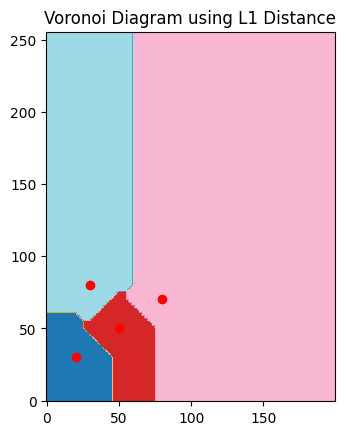

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generate_voronoi_l1(width, height, seed_points):
    """
    Generate a Voronoi diagram on a cell grid using L1 distance.

    Args:
        grid_size (tuple): The size of the grid (rows, columns).
        seed_points (list): List of (x, y) tuples representing seed points.

    Returns:
        np.ndarray: A 2D array with the same size as the grid, where each cell contains the index of the nearest seed point.
    """
    rows, cols = height, width
    seeds = np.array(seed_points)
    num_seeds = len(seeds)
    
    # Create a coordinate grid
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    coordinates = np.stack([x, y], axis=-1)
    
    # Initialize distance and index grids
    distance_grid = np.full((rows, cols), np.inf)
    index_grid = np.full((rows, cols), -1)
    
    # Compute L1 distance for each seed point and update grids
    for idx, (sx, sy) in enumerate(seeds):
        distances = np.abs(coordinates[..., 0] - sx) + np.abs(coordinates[..., 1] - sy)
        update_mask = distances < distance_grid
        distance_grid[update_mask] = distances[update_mask]
        index_grid[update_mask] = idx
    
    return index_grid

# Example usage
grid_size = 256
seed_points = [(20, 30), (50, 50), (80, 70), (30, 80)]
voronoi_grid = generate_voronoi_l1(200, grid_size, seed_points)

# To visualize the Voronoi diagram (optional)
plt.imshow(voronoi_grid, cmap='tab20', origin='lower')
plt.scatter([p[0] for p in seed_points], [p[1] for p in seed_points], color='red')
plt.title("Voronoi Diagram using L1 Distance")
plt.show()
